# Scores of matches with crowd vs without crowd   

<br>
<br>
<center>
    <img src="https://as.com/futbol/imagenes/2019/12/23/videos/1577099637_704457_1577100052_noticia_normal.jpg" width="450" alt="soccer.logo"  />
</center>
<br>

<div style="text-align: right"> <b>By David Clavijo</b> </div>  


# About this Notebook

This notebook aims to find out if the results of the soccer matches are affected by the amount of the crowd in the stadium.  
  
In the matches of soccer is an assumption that the crowd "helps" to win to their team with their support (encouragement). In most of the matches in one championship local (league) the local team has the public in favor (almost all attendance). Then, to find out if one team is "helped" by his fans we can assume that the crowd in the stadium is all in favor of the local team, and analyze the results of the local team with his fans vs without them.

## About Database

Database collected for forecasting the results of soccer matches (**Credits:https://www.football-data.co.uk/**).
The database consists of data of the five main leagues of world soccer by country **English Premier League (England), La Liga (Spain), Serie A (Italy), Bundesliga (Germany), and League 1 (France)**.
In the database, the data are recorded in a table for the season by each league. Example: EPL_2001, EPL, 2002, EPL_2003, etc.
The table is called using the following description:

*   EPL: English Premier League (England)
*   LALIGA: La Liga (Spain)
*   SA: Serie A (Italy)
*   BUNDESLIGA: Bundesliga (Germany)
*   L1: League 1 (France)

After each code by the league is used, the next character is "underscore",  and then continue the year of begin of the season like 2001, 2010, 2020, etc.

Further to the tables by each league and year, in the Database, I created  5 tables with records of the attendance in matches by each league, because the other tables don't exist the records of attendance. The tables are called:

*   attendance_epl
*   attendance_laliga
*   attendance_sa
*   attendance_bundesliga
*   attendance_l1

you can see how I get the data from the web site of ESPN using web-scraping in my GitHub repository. The notebook is called **Web Scraping in ESPN**

### Headers code (only the codes of our interest )

the next code shows the abbreviations to headers of the tables:

**In the tables by each league and year**  
Date = Match Date (yyyy/mm/dd)   
HomeTeam = Home Team  
AwayTeam = Away Team  
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)    
Attendance = Crowd Attendance  
  
**In the tables of attendance**  
date= Match Date (yyyy/mm/dd)  
home_team= Home Team  
away_team= Away Team  
attendance= Crowd Attendance  

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 

# Connect to Database.

The source of the data is a Database of Db2 (IBM Database). To connect with the database we can use the library **sqlalchemy** that helps to load the data and edit them like a dataframe of pandas:

In [2]:
!pip install sqlalchemy==1.3.9 #install libraries if you don't have them.
from sqlalchemy import create_engine

     |████████████████████████████████| 6.0 MB 18.7 MB/s eta 0:00:01
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp38-cp38-linux_x86_64.whl size=1209506 sha256=c5e820c3f16827ae385e3f478369e30d81d7901e6e54e17c7c5ba8bf1da4df95
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/cb/43/46/fa638f2422554332b7865d600275b24568bf60e76104a94bb4
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.22
    Uninstalling SQLAlchemy-1.4.22:
      Successfully uninstalled SQLAlchemy-1.4.22


### connection to Database..
in the next chunk of code hidden (personal access to the database), the connection is established.

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
#Connection to Database...
#SQL Alchemy URL
engine = create_engine(sqla_url)
conn = engine.connect()

### Retrieve data into Pandas  
  
  To edit the data in pandas we can load each table of the database in one dataframe to each one. The database has next tables:  
  
**EPL**  2001 to 2020  
**Bundesliga**  2003 to 2020  
**La Liga** 2000 to 2020  
**Serie A** 2002 to 2020  
**Ligue 1** 2015 to 2020  

**attendance_epl** 2003 to 2020 (only one table)  
**attendance_laliga** 2003 to 2020 (only one table)  
**attendance_sa** 2003 to 2020 (only one table)  
**attendance_bundesliga** 2003 to 2020 (only one table)   
**attendance_l1** 2015 to 2020 (only one table)  

Create list of table names:

In [5]:
#list of years
years=[str(2000+i) for i in range(21)] #2000 to 2020

#list of leagues by each year
epl=["epl_"+i for i in years]
bundesliga=["bundesliga_"+i for i in years]
laliga=["laliga_"+i for i in years]
seriea=["sa_"+i for i in years]
ligue1=["l1_"+i for i in years]
tables=epl[3:]+bundesliga[3:]+laliga[3:]+seriea[3:]+ligue1[-6:]
print(tables)

['epl_2003', 'epl_2004', 'epl_2005', 'epl_2006', 'epl_2007', 'epl_2008', 'epl_2009', 'epl_2010', 'epl_2011', 'epl_2012', 'epl_2013', 'epl_2014', 'epl_2015', 'epl_2016', 'epl_2017', 'epl_2018', 'epl_2019', 'epl_2020', 'bundesliga_2003', 'bundesliga_2004', 'bundesliga_2005', 'bundesliga_2006', 'bundesliga_2007', 'bundesliga_2008', 'bundesliga_2009', 'bundesliga_2010', 'bundesliga_2011', 'bundesliga_2012', 'bundesliga_2013', 'bundesliga_2014', 'bundesliga_2015', 'bundesliga_2016', 'bundesliga_2017', 'bundesliga_2018', 'bundesliga_2019', 'bundesliga_2020', 'laliga_2003', 'laliga_2004', 'laliga_2005', 'laliga_2006', 'laliga_2007', 'laliga_2008', 'laliga_2009', 'laliga_2010', 'laliga_2011', 'laliga_2012', 'laliga_2013', 'laliga_2014', 'laliga_2015', 'laliga_2016', 'laliga_2017', 'laliga_2018', 'laliga_2019', 'laliga_2020', 'sa_2003', 'sa_2004', 'sa_2005', 'sa_2006', 'sa_2007', 'sa_2008', 'sa_2009', 'sa_2010', 'sa_2011', 'sa_2012', 'sa_2013', 'sa_2014', 'sa_2015', 'sa_2016', 'sa_2017', 'sa_20

the next code loads the tables of the database using pandas and concatenates them. This way we create **one** Dataframe for the tables with stats **without** the records of attendance. The tables of attendance will be joined by others. The aim is to get one data frame with the dates, teams, results (wins, draws, or loses), and attendance to analyze the data.

In [6]:
import pandas as pd

In [7]:
df_stats=pd.DataFrame()

for table in tables:
    #query statement to retrieve all rows in table
    selectQuery = "select * from "+table
    #retrieve the query results into a pandas dataframe
    try:
        df_table = pd.read_sql(sql=selectQuery, con=engine)
        df_stats=pd.concat([df_stats,df_table],ignore_index=True)
        print("sucessfully : ",table)
    except:
        print("error : ",table)

sucessfully :  epl_2003
sucessfully :  epl_2004
sucessfully :  epl_2005
sucessfully :  epl_2006
sucessfully :  epl_2007
sucessfully :  epl_2008
sucessfully :  epl_2009
sucessfully :  epl_2010
sucessfully :  epl_2011
sucessfully :  epl_2012
sucessfully :  epl_2013
sucessfully :  epl_2014
sucessfully :  epl_2015
sucessfully :  epl_2016
sucessfully :  epl_2017
sucessfully :  epl_2018
sucessfully :  epl_2019
sucessfully :  epl_2020
sucessfully :  bundesliga_2003
sucessfully :  bundesliga_2004
sucessfully :  bundesliga_2005
sucessfully :  bundesliga_2006
sucessfully :  bundesliga_2007
sucessfully :  bundesliga_2008
sucessfully :  bundesliga_2009
sucessfully :  bundesliga_2010
sucessfully :  bundesliga_2011
sucessfully :  bundesliga_2012
sucessfully :  bundesliga_2013
sucessfully :  bundesliga_2014
sucessfully :  bundesliga_2015
sucessfully :  bundesliga_2016
sucessfully :  bundesliga_2017
sucessfully :  bundesliga_2018
sucessfully :  bundesliga_2019
sucessfully :  bundesliga_2020
sucessfull

the next line shows the headers of the columns in the dataframe. In this analysis we need the columns:   
DATE  
hometeam  
awayteam   
ftr ( the result of the match H=Home Win, D=Draw, A=Away Win)  

In [8]:
#list of columns
df_stats.columns.values

array(['INDEX', 'div', 'DATE', 'hometeam', 'awayteam', 'fthg', 'ftag',
       'ftr', 'hthg', 'htag', 'htr', 'referee', 'hs', 'AS', 'hst', 'ast',
       'hf', 'af', 'hc', 'ac', 'hy', 'ay', 'hr', 'ar', 'b365h', 'b365d',
       'b365a', 'gbh', 'gbd', 'gba', 'iwh', 'iwd', 'iwa', 'lbh', 'lbd',
       'lba', 'soh', 'sod', 'soa', 'sbh', 'sbd', 'sba', 'whh', 'whd',
       'wha', 'gb_2_5', 'gb_2_5_1', 'b365_2_5', 'b365_2_5_1', 'gbahh',
       'gbaha', 'gbah', 'lbahh', 'lbaha', 'lbah', 'b365ahh', 'b365aha',
       'b365ah', 'bwh', 'bwd', 'bwa', 'sjh', 'sjd', 'sja', 'vch', 'vcd',
       'vca', 'bb1x2', 'bbmxh', 'bbavh', 'bbmxd', 'bbavd', 'bbmxa',
       'bbava', 'bbou', 'bbmx_2_5', 'bbav_2_5', 'bbmx_2_5_1',
       'bbav_2_5_1', 'bbah', 'bbahh', 'bbmxahh', 'bbavahh', 'bbmxaha',
       'bbavaha', 'bsh', 'bsd', 'bsa', 'psh', 'psd', 'psa', 'psch',
       'pscd', 'psca', 'TIME', 'maxh', 'maxd', 'maxa', 'avgh', 'avgd',
       'avga', 'p_2_5', 'p_2_5_1', 'max_2_5', 'max_2_5_1', 'avg_2_5',
       'avg_2_

In [9]:
#We select the columns that we need in this analysis
df_stats=df_stats[["DATE","hometeam","awayteam","ftr"]]
df_stats.head()

,DATE,hometeam,awayteam,ftr
0,2003-08-16,Arsenal,Everton,H
1,2003-08-16,Birmingham,Tottenham,H
2,2003-08-16,Blackburn,Wolves,H
3,2003-08-16,Fulham,Middlesbrough,H
4,2003-08-16,Leicester,Southampton,D


In [10]:
print("we have",df_stats.shape[0],"records in the dataframe of stats")

we have 28133 records in the dataframe of stats


Now we create the dataframes of the tables of attendance:

In [11]:
attendance_epl = pd.read_sql(sql="select * from attendance_epl", con=engine)
attendance_laliga = pd.read_sql(sql="select * from attendance_laliga", con=engine)
attendance_bundesliga = pd.read_sql(sql="select * from attendance_bundesliga", con=engine)
attendance_sa = pd.read_sql(sql="select * from attendance_sa", con=engine)
attendance_l1 = pd.read_sql(sql="select * from attendance_l1", con=engine)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 
### Data Cleaning

before joining the data frames we have to rename the names of the teams in the data frames so that all names are the same to the join them.  

we can see the names of the teams:

In [12]:
list_uniques=sorted(df_stats['hometeam'].unique().tolist())
for i in list_uniques:
    print(i)

Aachen
Ajaccio GFCO
Alaves
Albacete
Almeria
Amiens
Ancona
Angers
Arsenal
Ascoli
Aston Villa
Atalanta
Ath Bilbao
Ath Madrid
Augsburg
Barcelona
Bari
Bastia
Bayern Munich
Benevento
Betis
Bielefeld
Birmingham
Blackburn
Blackpool
Bochum
Bologna
Bolton
Bordeaux
Bournemouth
Braunschweig
Brescia
Brest
Brighton
Burnley
Cadiz
Caen
Cagliari
Cardiff
Carpi
Catania
Celta
Cesena
Charlton
Chelsea
Chievo
Cordoba
Cottbus
Crotone
Crystal Palace
Darmstadt
Derby
Dijon
Dortmund
Duisburg
Eibar
Ein Frankfurt
Elche
Empoli
Espanol
Everton
FC Koln
Fiorentina
Fortuna Dusseldorf
Freiburg
Frosinone
Fulham
Genoa
Getafe
Gimnastic
Girona
Granada
Greuther Furth
Guingamp
Hamburg
Hannover
Hansa Rostock
Hercules
Hertha
Hoffenheim
Huddersfield
Huesca
Hull
Ingolstadt
Inter
Juventus
Kaiserslautern
Karlsruhe
La Coruna
Las Palmas
Lazio
Lecce
Leeds
Leganes
Leicester
Lens
Levante
Leverkusen
Lille
Liverpool
Livorno
Lorient
Lyon
M'gladbach
Mainz
Malaga
Mallorca
Man City
Man United
Marseille
Messina
Metz
Middlesbrough
Milan
Modena


In [13]:
list_uniques_attendance=sorted(attendance_bundesliga['home_team'].unique().tolist())
for i in list_uniques_attendance:
    print(i)

1. FC Union Berlin
Arminia Bielefeld
Bayer Leverkusen
Bayern Munich
Borussia Dortmund
Borussia Monchengladbach
Cologne
Eintracht Frankfurt
Energie Cottbus
FC Augsburg
FC Cologne
FC Ingolstadt 04
Fortuna Düsseldorf
Hamburg SV
Hannover 96
Hansa Rostock
Hertha Berlin
Kaiserslautern
Karlsruher SC
MSV Duisburg
Mainz
Nurnberg
RB Leipzig
SC Freiburg
SC Paderborn 07
SV Darmstadt 98
Schalke 04
SpVgg Greuther Furth
St Pauli
TSG Hoffenheim
TSV 1860 Munich
TSV Eintracht Braunschweig
VfB Stuttgart
VfL Bochum
VfL Wolfsburg
Werder Bremen


with the plot of the teams, we can identify the teams with misspellings or different writing:  

|**table attendance**|**table stats**|
| -------------------| --------------|
| AFC Bournemouth    |  Bournemouth  |
| Birmingham City    |  Birmingham   |                        
| Blackburn Rovers   |  Blackburn    |         
| Bolton Wanderers  |  Bolton       |    
| Brighton & Hove Albion   |  Brigthon     |     
| Cardiff City       |  Cardiff      |   
| Charlton Athletic  |  Charlton     |      
| Derby County       |  Derby        |  
| Huddersfield Town  |  Huddersfield |             
| Hull City          |  Hull         |
| Leeds United       |  Leeds        |  
| Leicester City     |  Leicester    |        
| Manchester City    |  Man City     |     
| Manchester United  |  Man United   |        
| Newcastle United   |  Newcastle    |        
| Norwich City       |  Norwich      |  
| Queens Park Rangers |  QPR          | 
| Stoke City         |  Stoke        |
| Swansea City       |  Swansea      |
| Tottenham Hotspur  |  Tottenham    |     
| West Bromwich Albion  |  West Brom    |
| West Ham United    |  West Ham     |
| Wigan Athletic     |  Wigan        |
| Wolverhampton Wanderers |  Wolves       |
| Athletic Bilbao    |  Ath Bilbao   |                
| Atletico Madrid    |  Ath Madrid   |           
| Celta Vigo         |  Celta        |
| Cádiz              |  Cadiz        |
| Córdoba            |  Cordoba      |
| Deportivo La Coruña|  La Coruna    |
| Espanyol           |  Espanol      |
| Leganés            |  Leganes      |
| Málaga             |  Malaga       |
| Racing Santander   |  Santander    |
| Rayo Vallecano     |  Vallecano    |
| Real Betis         |  Betis        |
| Real Valladolid    |  Valladolid   |
| Real Zaragoza      |  Zaragoza     |
| Recreativo Huelva  |  Recreativo   |
| Sporting Gijón     |  Sp Gijon     |
| AC Milan           |  Milan        |
| AS Roma            |  Roma         |
| Chievo Verona      |  Chievo       |
| Hellas Verona      |  Verona       |
| Inter Milan        |  Inter        |
| Internazionale     |  Inter        |
| SPAL               |  Spal         |
| US Pescara         |  Pescara      |
| 1. FC Union Berlin |  Union Berlin |
| Arminia Bielefeld  |  Bielefeld    |
| Bayer Leverkusen   |  Leverkusen   |
| Borussia Dortmund  |  Dortmund     |
| Borussia Monchengladbach | M'gladbach |
| Cologne            |  FC Koln      |
| FC Cologne         |  FC Koln      |
| Eintracht Frankfurt | Ein Frankfurt |
| Energie Cottbus    |  Cottbus      |
| FC Augsburg        |  Augsburg     |
| FC Ingolstadt 04   |  Ingolstadt    |
| Fortuna Düsseldorf |  Fortuna Dusseldorf |
| Hamburg SV         |  Hamburg      |
| Hannover 96        |  Hannover     |
| Hertha Berlin      |  Hertha       |
| Karlsruher SC      |  Karlsruhe    |
| MSV Duisburg       |  Duisburg     |
| SC Freiburg        |  Freiburg     |
| SC Paderborn 07    |  Paderborn    |
| SV Darmstadt 98    |  Darmstadt    |
| SpVgg Greuther Furth | Greuther Furth |
| TSG Hoffenheim     |  Hoffenheim   |
| TSV 1860 Munich    |  Munich 1860 |
| TSV Eintracht Braunschweig | Braunschweig |
| VfB Stuttgart      |  Stuttgart   |
| VfL Bochum         |  Bochum      |
| VfL Wolfsburg      |  Wolfsburg   |
| AS Monaco          |  Monaco      |
| AS Nancy Lorraine  |  Nancy       |
| Dijon FCO          |  Dijon       |
| GFC Ajaccio        |  Ajaccio GFCO |
| Paris Saint-Germain | Paris SG |
| Stade de Reims  | Reims |
| Stade Rennais | Rennes |

The names of the teams in the attendance dataset are more "simple" so that we can rename the teams how are in df_stats.  
The next step is to concatenate the dataframes of attendance and then rename the teams:

In [14]:
df_attendance=pd.concat([attendance_epl,attendance_laliga,attendance_bundesliga,attendance_sa,attendance_l1],ignore_index=True)

In [15]:
list_original=["AFC Bournemouth", "Birmingham City", "Blackburn Rovers" , "Bolton Wanderers"  , "Brighton & Hove Albion"  , "Cardiff City" , "Charlton Athletic"  , 
                 "Derby County" , "Huddersfield Town" , "Hull City" , "Leeds United" , "Leicester City" , "Manchester City" , "Manchester United"  , "Newcastle United" , 
                 "Norwich City" , "Queens Park Rangers" , "Stoke City", "Swansea City" , "Tottenham Hotspur"  , "West Bromwich Albion"  , "West Ham United" , 
                 "Wigan Athletic" , "Wolverhampton Wanderers" , "Athletic Bilbao"    , "Atletico Madrid"    , "Celta Vigo"  , "Cádiz"  , "Córdoba" , "Deportivo La Coruña", "Espanyol", 
                 "Leganés" , "Málaga" , "Racing Santander"   , "Rayo Vallecano"  , "Real Betis", "Real Valladolid" , "Real Zaragoza"  , "Recreativo Huelva"  , 
                 "Sporting Gijón"  , "AC Milan" , "AS Roma" , "Chievo Verona"   , "Hellas Verona" , "Inter Milan" , "Internazionale" , "SPAL", "US Pescara" , 
                 "1. FC Union Berlin" , "Arminia Bielefeld"  , "Bayer Leverkusen"   , "Borussia Dortmund"  , "Borussia Monchengladbach" , "Cologne" , "FC Cologne" , "Eintracht Frankfurt" , 
                 "Energie Cottbus"    , "FC Augsburg" , "FC Ingolstadt 04"   , "Fortuna Düsseldorf" , "Hamburg SV"  , "Hannover 96"  , "Hertha Berlin"  , "Karlsruher SC" , "MSV Duisburg" , 
                 "SC Freiburg"  , "SC Paderborn 07"    , "SV Darmstadt 98"    , "SpVgg Greuther Furth" , "TSG Hoffenheim"  , "TSV 1860 Munich"  , "TSV Eintracht Braunschweig", "VfB Stuttgart", 
                 "VfL Bochum" , "VfL Wolfsburg"  , "AS Monaco"  , "AS Nancy Lorraine"  , "Dijon FCO"   , "GFC Ajaccio"  , "Paris Saint-Germain" , "Stade de Reims","Stade Rennais"]
list_modified=[ "Bournemouth"  ,  "Birmingham"   ,  "Blackburn"    ,  "Bolton" ,  "Brigthon" ,  "Cardiff" ,  "Charlton"  ,  "Derby"  ,  "Huddersfield" ,  "Hull",  "Leeds" ,  
               "Leicester"    ,  "Man City"     ,  "Man United"   ,  "Newcastle"    ,  "Norwich" ,  "QPR"  ,  "Stoke"  ,  "Swansea"  ,  "Tottenham"    ,  "West Brom"    ,  "West Ham"  ,  "Wigan" ,  
               "Wolves"  ,  "Ath Bilbao"   ,  "Ath Madrid"   ,  "Celta"  ,  "Cadiz"   ,  "Cordoba" ,  "La Coruna" ,  "Espanol" ,  "Leganes"  ,  "Malaga"  , "Santander"  ,  "Vallecano"   ,  "Betis" ,
               "Valladolid"   ,  "Zaragoza"  ,  "Recreativo"   ,  "Sp Gijon" ,  "Milan"  ,  "Roma"  ,  "Chievo"  ,  "Verona"   ,  "Inter"  ,  "Inter"  ,  "Spal"  ,  "Pescara"  ,  "Union Berlin" ,  "Bielefeld" ,  
               "Leverkusen"   ,  "Dortmund"  , "M'gladbach" ,  "FC Koln" ,  "FC Koln"  , "Ein Frankfurt" ,  "Cottbus"  ,  "Augsburg"  ,  "Ingolstadt" ,  "Fortuna Dusseldorf" ,  "Hamburg" ,  "Hannover" , 
               "Hertha" ,  "Karlsruhe"    ,  "Duisburg",  "Freiburg"     ,  "Paderborn"    ,  "Darmstadt"    , "Greuther Furth" ,  "Hoffenheim"   ,  "Munich 1860" , "Braunschweig" ,  "Stuttgart"   ,  "Bochum" ,  
               "Wolfsburg"   ,  "Monaco"  ,  "Nancy"   ,  "Dijon"  ,  "Ajaccio GFCO" , "Paris SG" , "Reims","Rennes"] 

df_attendance=df_attendance.replace(list_original,list_modified)

In [16]:
df_attendance.head()

,home_team,away_team,attendance,DATE
0,Birmingham,Tottenham,29358.0,2003-08-16
1,Portsmouth,Aston Villa,20101.0,2003-08-16
2,Arsenal,Everton,38014.0,2003-08-16
3,Blackburn,Wolves,26270.0,2003-08-16
4,Fulham,Middlesbrough,14546.0,2003-08-16


In [17]:
df_attendance = df_attendance.rename(columns={'home_team': 'hometeam', 'away_team': 'awayteam'}) #rename headers before join the dataframes

In [18]:
print("we have",df_attendance.shape[0],"records in the dataframe of attendance")

we have 13280 records in the dataframe of attendance


In [19]:
dataframe=df_attendance.merge(df_stats,on=['hometeam','awayteam','DATE'],how='inner')
print("we have",dataframe.shape[0],"records in the dataframe after the join")
#notice that the size of the dataframe joining both of them is lower than the size of df_attendance 
#because there are records that don't exist in both. The join inner is the interception of the sets.

we have 11370 records in the dataframe after the join


In [20]:
dataframe=dataframe.dropna() #delete the null values
print("we have",dataframe.shape[0],"records in the dataframe after delet the null values")

we have 11345 records in the dataframe after delet the null values


In [21]:
dataframe.head()

,hometeam,awayteam,attendance,DATE,ftr
0,Birmingham,Tottenham,29358.0,2003-08-16,H
1,Portsmouth,Aston Villa,20101.0,2003-08-16,H
2,Arsenal,Everton,38014.0,2003-08-16,H
3,Blackburn,Wolves,26270.0,2003-08-16,H
4,Fulham,Middlesbrough,14546.0,2003-08-16,H


The next step is to transform variables of the results in the matches (column "ftr"). To analyze the data, we transform these categorical variables into numerical, considering the results for the Home team. Then we transform them like following:

H=3 (In football the winner get three points)  
D=1 (In football a draw give two points)  
A=0 (In football the loser don't get points)  

The following line transforms the variables:

In [22]:
dataframe['ftr']=dataframe['ftr'].replace(['H','D','A',],['3','1','0']).astype(int)
dataframe.head()

,hometeam,awayteam,attendance,DATE,ftr
0,Birmingham,Tottenham,29358.0,2003-08-16,3
1,Portsmouth,Aston Villa,20101.0,2003-08-16,3
2,Arsenal,Everton,38014.0,2003-08-16,3
3,Blackburn,Wolves,26270.0,2003-08-16,3
4,Fulham,Middlesbrough,14546.0,2003-08-16,3


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 
### Exploratory Data Analysis

The first step after preparing the data is to plot them and find out correlations.

No handles with labels found to put in legend.


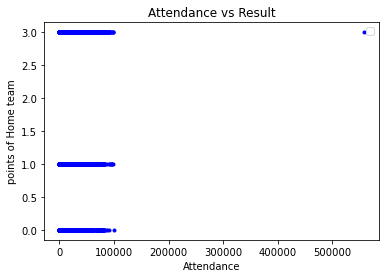

In [23]:
import matplotlib.pyplot as plt
x=dataframe['attendance'] # variable in the axis "x"
y=dataframe['ftr'] #variable in the axis "y"
fig=plt.figure() #create the space of the plot
ax=fig.add_subplot(111) #allow define the amount of graphs in a plot
ax.scatter(x,y, color='blue', marker='.') #create scater plot

#Legends
ax.set(title='Attendance vs Result', ylabel='points of Home team', xlabel='Attendance')
ax.legend(loc='best') 
plt.show()

In the plot, we can see that exists one outlier that is an error, so that isn't possible an attendance bigger than 500000 people. Then is necessary to drop the outlier values.

In [24]:
list_attendance_errors=[]
for i in dataframe['attendance']:
    if i>150000:
        print("outlier : ",i)
        list_attendance_errors.append(dataframe['attendance'][ dataframe['attendance']== i].index[0])
        
dataframe=dataframe.drop(list_attendance_errors,axis=0)

outlier :  558000.0


No handles with labels found to put in legend.


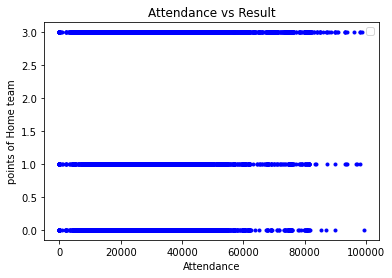

In [25]:
#plot new graph
x=dataframe['attendance'] # variable in the axis "x"
y=dataframe['ftr'] #variable in the axis "y"
fig=plt.figure() #create the space of the plot
ax=fig.add_subplot(111) #allow define the amount of graphs in a plot
ax.scatter(x,y, color='blue', marker='.') #create scater plot

#Legends
ax.set(title='Attendance vs Result', ylabel='points of Home team', xlabel='Attendance')
ax.legend(loc='best') 
plt.show()

In the previous graph isn't possible to find out one correlation between the variables, however, we can analyze the data doing a transformation to logistic function. This is the function most approximately to the behavior of the data:  

$$ f(x)=\frac{L}{1+e^{-k(x-x_0)}}$$  


$f(x)$	=	output of the function  
$L$	=	the curve's maximum value  
$k$	=	logistic growth rate or steepness of the curve  
$x_0$	=	the x value of the sigmoid midpoint  
$x$	=	real number    

The logistic function is broadly used to analyze probabilities due to its shape, in which the maximum value is the 100% probability that the event occurs and the minimum value is the 0% probability. The following curve is an example of  the logistic function:
  
<br>
<br>
<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg" width="450" alt="soccer.logo"  />
</center>
<br>
  

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 
## Logistic Regression

With the logistic regression, we get a model in which represents the behavior of the data following the sigmoid function. There are three types of logistic Regression:  

**Binary Logistic Regression**: The target variable has only two possible outcomes as Spam or Not Spam, Cancer, or No Cancer. 

**Multinomial Logistic Regression**: The target variable has three or more nominal categories such as predicting the type of Wine.  

**Ordinal Logistic Regression**: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

Our data are in the third case, Ordinal logistic regression. Then, to analyze the data we can use the function OrderedLogit that allows us to find out the functions considering when there is victory, draw or defeat:

In [26]:
import sys
!conda install git #install git if you enviroment don't have it
!pip install git+https://github.com/Shopify/bevel.git #install library bevel
!pip install numdifftools #install numdiftools library

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.8-main

  added / updated specs:
    - git


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    curl-7.69.1                |       hbc83047_0         137 KB
    expat-2.4.1                |       h2531618_2         168 KB
    gettext-0.21.0             |       hf68c758_0         2.6 MB
    git-2.32.0                 | pl5262hc120c5b_1         5.9 MB
    libcurl-7.69.1             |       h20c2e04_0         431 KB
    libiconv-1.15              |       h63c8f33_5         721 KB
    libssh2-1.9.0              |       h1ba5d50_1         269 KB
    pcre2-10.35                |       h14c3975_1         487 KB
  

In [27]:
from bevel.linear_ordinal_regression import OrderedLogit #import bevel library

In [28]:
model_ord_logit=OrderedLogit()
x=dataframe['attendance'] # variable in the axis "x"
y=dataframe['ftr'] #variable in the axis "y"
model_ord_logit.fit(x,y)#fit the model to data
model_ord_logit.print_summary() #print summary of the coefficients

n=11344
                  beta  se(beta)      p  lower 0.95  upper 0.95   
attribute names                                                   
column_1        0.0000    0.0004 0.9734     -0.0008      0.0009   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Somers' D = 0.100


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/bevel/linear_ordinal_regression.py:258: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diagonal(P.dot(inv(H)).dot(P.T)))


### Obtain the coefficients, the intercepts, and the standard errors
The intercepts define the thresholds between a loss and a draw (L|D) and draw and a win (D|W). The probabilities are dependent on (a) the coefficient (i.e., attendance) and (b) the intercepts. 

In [29]:
# Obtain the coefficients and the intercepts
print(f'beta = {model_ord_logit.coef_[0]:.9f}')
print(f'interceptL|D = {model_ord_logit.coef_[1]:.4f}')
print(f'interceptD|W = {model_ord_logit.coef_[2]:.4f}')
print(model_ord_logit.coef_)

beta = 0.000014250
interceptL|D = -0.4734
interceptD|W = 0.6124
[ 1.42496374e-05 -4.73413741e-01  6.12440499e-01]


In [30]:
#Standar errors
print(model_ord_logit.se_)

[0.00042808 0.01577567        nan]


### Interpreting the coefficients

We obtain two functions that represent the probabilities of events (win, draw or lose):  

$$ f(L/D)=\frac{1}{1+e^{0.4734+1.42496e-05*attendance}}$$  

$$ f(D/W)=\frac{1}{1+e^{-0.6124+1.42496e-05*attendance}}$$  

The Somers' D value is a measure of the goodness-of-fit of the model, analogous to the R² value in ordinary linear regression. However, unlike R², it can vary between -1 (totally discordant) and 1 (totally concordant). We get a Somers' D = 0.100 in the model, which represents close to 55% of goodness-of-fit. About the standard errors of the coefficients, we get values very low, though we get one error to the third coefficient, probably due to the magnitude of the coefficient.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 
### Ploting the models

We can plot the functions together with the data to visualize the behavior that our model describes. First, we calculate the values of the curve and then plot them:

In [31]:
#create the data
import numpy as np
dataframe['predL']=1/(1+np.exp(-(model_ord_logit.coef_[1]-model_ord_logit.coef_[0]*dataframe['attendance']))) #predict of loses
dataframe['predD']=1/(1+np.exp(-(model_ord_logit.coef_[2]-model_ord_logit.coef_[0]*dataframe['attendance'])))-dataframe['predL'] #predict of draws
dataframe['predW']=1-dataframe['predL']-dataframe['predD'] #predict of Wins

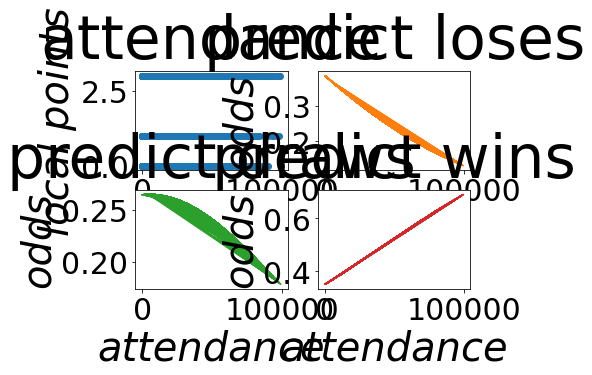

In [32]:
#plot the data

y1=dataframe['predL'] # variable in the axis "y"
y2=dataframe['predD']
y3=dataframe['predW']

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(x, y)
axs[0, 0].set_title('attendance',fontsize=60)
axs[0, 0].tick_params(labelsize=30)
axs[0, 0].set_ylabel('local points',fontsize=40, fontstyle='italic')

axs[0, 1].plot(x, y1, 'tab:orange')
axs[0, 1].set_title('predict loses',fontsize=60)
axs[0, 1].tick_params(labelsize=30)
axs[0, 1].set_ylabel('odds',fontsize=40,fontstyle='italic')


axs[1, 0].plot(x, y2, 'tab:green')
axs[1, 0].set_title('predict draws',fontsize=60)
axs[1, 0].tick_params(labelsize=30)
axs[1, 0].set_ylabel('odds',fontsize=40,fontstyle='italic')
axs[1, 0].set_xlabel('attendance',fontsize=40,fontstyle='italic')

axs[1, 1].plot(x, y3, 'tab:red')
axs[1, 1].set_title('predict wins',fontsize=60)
axs[1, 1].tick_params(labelsize=30)
axs[1, 1].set_ylabel('odds',fontsize=40,fontstyle='italic')
axs[1, 1].set_xlabel('attendance',fontsize=40,fontstyle='italic')
    
plt.rcParams['figure.figsize'] = [60, 30]

### Interpreting the plots

1-The first plot (up-left) is the original behavior of the attendance records without transforming them. We can see that the distribution of the data doesn't have a pattern clear.

2-The second plot (up-right) is the relationship between attendance vs probabilities of the losses. The graph shows the behavior of the data of attendance in the losses probabilities. We can see one inverse relationship while growing the attendance downs the loss probability.

3-The third plot (down-left) is the relationship between vs probabilities of the draws. The graph shows the behavior of the data of attendance in the draws probabilities. We can see one inverse relationship while growing the attendance down the draw probability.

4-The fourth plot (down-right) is the relationship between attendance vs probabilities of the wins. The graph shows the behavior of the data of attendance in the wins probabilities. We can see one direct relationship while growing the attendance grow the win probability.  

**_The plots suggest that attendance affect positively the propability of win of the local team._**

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 
### Using the model to predict  

Though the graphs show a behavior, is necessary to assess the results of the model vs original data, and then consider a strong relationship between attendance and the result of matches. In this case, we don't interest analyze the performance of the model to predict future data. Therefore we don't analyze parameters like overfitting.  

The following code calculates the values of prediction:


In [33]:
# Obtain the fitted probabilities of each event 
model_ord_logit.predict_probabilities(dataframe[['attendance']])

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/bevel/linear_ordinal_regression.py:154: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return X.dot(self.beta_)[:, None]


array([[0.29074787, 0.25762526, 0.45162686],
       [0.31867977, 0.26210811, 0.41921212],
       [0.26598306, 0.25169825, 0.48231868],
       ...,
       [0.38380858, 0.26468874, 0.35150269],
       [0.38380858, 0.26468874, 0.35150269],
       [0.38380858, 0.26468874, 0.35150269]])

In [34]:
# Returns the output with highest probability 
model_ord_logit.predict_class(dataframe[['attendance']])

array([3, 3, 3, ..., 0, 0, 0])

The method **predict_class** estimate the ordinal variables (0,1,3) with the highest probability, example:  
for one attendance of 30.000 people we get the probabilities:  
win=0.6  
draw=0.2   
lose=0.2  

Then the method retrieves as a result the value "3" that corresponds to the value to win.

In [35]:
#Convert array into dataframe to compare with the true values
fitted_results = model_ord_logit.predict_class(dataframe[['attendance']])
fitted_results_df = pd.DataFrame(fitted_results, columns = ['fitted_results'])
fitted_results_df.shape

(11344, 1)

In [36]:
# Append the fitted results to data frame to compare them with true values in "ftr" column
dataframe ['fitted_results'] = fitted_results_df
dataframe.head()

,hometeam,awayteam,attendance,DATE,ftr,predL,predD,predW,fitted_results
0,Birmingham,Tottenham,29358.0,2003-08-16,3,0.290748,0.257625,0.451627,3.0
1,Portsmouth,Aston Villa,20101.0,2003-08-16,3,0.318680,0.262108,0.419212,3.0
2,Arsenal,Everton,38014.0,2003-08-16,3,0.265983,0.251698,0.482319,3.0
3,Blackburn,Wolves,26270.0,2003-08-16,3,0.299905,0.259341,0.440754,3.0
4,Fulham,Middlesbrough,14546.0,2003-08-16,3,0.336108,0.263820,0.400072,3.0


In [37]:
# Obtain the success rate
dataframe['TRUE'] = np.where(dataframe['fitted_results']==dataframe['ftr'], 1, 0)
Total = dataframe['TRUE'].sum() #calculate the number of values that are the same
print("success rate : ",Total/int(fitted_results_df.shape[0]))

success rate :  0.45292665726375175


**_The score shows the model predicts 45% of the results. This value suggests that attendance can be considered like one variable that affects the result of the match. However, we must be careful to take a conclusion only with this analysis. It's necessary to consider that the effect showed can be due only to the fact that the team is local without having an account of the assistance value._**

Then we can estimate the success rate of the data before and during the pandemic, which the teams had that play without the crowd. This way we can compare if exist one difference between the results considering the assistance.  

The pandemic in football began in march of the year 2020, so that we split the dataframe in two, using the date 01/03/2020:

In [38]:
#creating the subsets

pandemic = pd.datetime(2020,3,7)

before_pandemic= dataframe.loc[pd.to_datetime(dataframe['DATE'],format='%Y-%m-%d') <= pandemic]
on_pandemic= dataframe.loc[pd.to_datetime(dataframe['DATE'],format='%Y-%m-%d')> pandemic]

on_pandemic.head()

<ipython-input-38-9d998d5b2d98>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandemic = pd.datetime(2020,3,7)


,hometeam,awayteam,attendance,DATE,ftr,predL,predD,predW,fitted_results,TRUE
5485,Chelsea,Everton,32125.0,2020-03-08,3,0.282685,0.255906,0.461409,3.0,1
5486,Chelsea,Everton,0.0,2020-03-08,3,0.383809,0.264689,0.351503,0.0,0
5487,Man United,Man City,0.0,2020-03-08,3,0.383809,0.264689,0.351503,0.0,0
5488,Leicester,Aston Villa,0.0,2020-03-09,3,0.383809,0.264689,0.351503,0.0,0
5489,Leicester,Aston Villa,0.0,2020-03-09,3,0.383809,0.264689,0.351503,0.0,0


In [39]:
print("we have",before_pandemic.shape[0],"records in the dataframe before the pandemic")

we have 10403 records in the dataframe before the pandemic


In [40]:
print("we have",on_pandemic.shape[0],"records in the dataframe during the pandemic")

we have 941 records in the dataframe during the pandemic


In [41]:
# Obtain the success rate

subtotal_on_pandemic = on_pandemic['TRUE'].sum() #calculate the number of values that are the same
print("success rate during the pandemic : ",subtotal_on_pandemic/int(on_pandemic.shape[0]))

subtotal_before_pandemic = before_pandemic['TRUE'].sum()
print("success rate before pandemic : ",subtotal_before_pandemic/int(before_pandemic.shape[0]))

success rate during the pandemic :  0.3517534537725824
success rate before pandemic :  0.46207824665961744


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)  

The results show that the prediction of the data on the pandemic have lower success than before the pandemic. However, the difference can be due to the fit of the model to the subset of the data. Then we can repeat the previous steps and create two models for each dataset, before and during the pandemic:

In [42]:
#drop colums. Dataframe Cleaning.
before_pandemic=before_pandemic.drop(["predL","predD","predW","fitted_results","TRUE"],axis=1).reset_index()
on_pandemic=on_pandemic.drop(["predL","predD","predW","fitted_results","TRUE"],axis=1).reset_index()

x2=before_pandemic['attendance'] # variable in the axis "x"
y2=before_pandemic['ftr'] #variable in the axis "y"

x3=on_pandemic['attendance'] # variable in the axis "x"
y3=on_pandemic['ftr'] #variable in the axis "y"

model_ord_logit2=OrderedLogit()
model_before_pandemic=model_ord_logit2.fit(x2,y2)#fit the model to data
model_ord_logit3=OrderedLogit()
model_on_pandemic=model_ord_logit3.fit(x3,y3)

#Convert array into dataframe to compare with the true values
fitted_results_before_pandemic = model_before_pandemic.predict_class(before_pandemic[['attendance']])
fitted_results_before_pandemic = pd.DataFrame(fitted_results_before_pandemic, columns = ['fitted_results'])
before_pandemic['fitted_results'] = fitted_results_before_pandemic

fitted_results_on_pandemic = model_on_pandemic.predict_class(on_pandemic[['attendance']])
fitted_results_on_pandemic = pd.DataFrame(fitted_results_on_pandemic, columns = ['fitted_results'])
on_pandemic['fitted_results'] = fitted_results_on_pandemic

# Obtain the success rate
before_pandemic['TRUE'] = np.where(before_pandemic['fitted_results']==before_pandemic['ftr'], 1, 0)
sub_total_before_pandemic = before_pandemic['TRUE'].sum() #calculate the number of values that are the same

on_pandemic['TRUE'] = np.where(on_pandemic['fitted_results']==on_pandemic['ftr'], 1, 0)
sub_total_on_pandemic = on_pandemic['TRUE'].sum() #calculate the number of values that are the same

print("success predictions model during the pandemic : ",sub_total_on_pandemic)
print("success predictions model before the pandemic : ",sub_total_before_pandemic)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/bevel/linear_ordinal_regression.py:258: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diagonal(P.dot(inv(H)).dot(P.T)))


success predictions model during the pandemic :  372
success predictions model before the pandemic :  4794


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/bevel/linear_ordinal_regression.py:258: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diagonal(P.dot(inv(H)).dot(P.T)))
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/bevel/linear_ordinal_regression.py:154: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return X.dot(self.beta_)[:, None]


In [43]:
print("success rate before pandemic new model : ",sub_total_before_pandemic/int(before_pandemic.shape[0]))
print("success rate during the pandemic new model : ",sub_total_on_pandemic/int(on_pandemic.shape[0]))

success rate before pandemic new model :  0.4608286071325579
success rate during the pandemic new model :  0.3953241232731137


In [44]:
model_before_pandemic.print_summary() #print summary of the coefficients

n=10403
                  beta  se(beta)      p  lower 0.95  upper 0.95   
attribute names                                                   
column_1        0.0000    0.0009 0.9863     -0.0018      0.0018   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Somers' D = 0.097


In [45]:
model_on_pandemic.print_summary() #print summary of the coefficients

n=941
                  beta  se(beta)   p  lower 0.95  upper 0.95   
attribute names                                                
column_1        0.0000       NaN NaN         NaN         NaN   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Somers' D = 0.001


In [46]:
# Obtain the coefficients and the intercepts
print(f'beta = {model_before_pandemic.coef_[0]:.9f}')
print(f'interceptL|D = {model_before_pandemic.coef_[1]:.4f}')
print(f'interceptD|W = {model_before_pandemic.coef_[2]:.4f}')
print(model_before_pandemic.coef_)

beta = 0.000015662
interceptL|D = -0.4223
interceptD|W = 0.6750
[ 1.56618356e-05 -4.22331019e-01  6.74959444e-01]


In [47]:
# Obtain the coefficients and the intercepts
print(f'beta = {model_on_pandemic.coef_[0]:.9f}')
print(f'interceptL|D = {model_on_pandemic.coef_[1]:.4f}')
print(f'interceptD|W = {model_on_pandemic.coef_[2]:.4f}')
print(model_on_pandemic.coef_)

beta = 0.000037412
interceptL|D = -0.5348
interceptD|W = 0.4379
[ 3.74116953e-05 -5.34791201e-01  4.37935777e-01]


The results confirm that the model using only the data of attendance during the pandemic is worse than the model using the data before the pandemic. The score Somers'D is mayor using the data before the pandemic and the success rate is better: 

|**model**           |**Somer's D**  |**Success Rate**|
| -------------------| --------------|------------   |
| Before pandemic    |  0.097        |  0.46207      |
| On pandemic        |  0.001        |  0.39532      |                        
  
  
**_Then we can consider that assistance is one variable that affects the results of the football matches._**


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)   

## Statistic Analysis

Further, analyze the data using models and find out correlations, we can use the descriptive statistics to compare the performance of the teams individual and general both during the pandemic and previously to this.

### Compare the results with crowd vs without crowd.

The first step most obviously in the statistical analysis is to compare the rate of victory of the home team before the pandemic vs during the pandemic.  
How the teams through years change your performance it's convenient to compare the data of the last year previous to the pandemic for each team:

In [48]:
#create dataframe of the year previous pandemic

last_year=pd.datetime(2018,7,1)
last_year_pandemic=before_pandemic.loc[pd.to_datetime(before_pandemic['DATE'],format='%Y-%m-%d')>=last_year]
last_year_pandemic.head()

<ipython-input-48-54495b8a3364>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  last_year=pd.datetime(2018,7,1)


,index,hometeam,awayteam,attendance,DATE,ftr,fitted_results,TRUE
4955,4955,Man United,Leicester,10353.0,2018-08-10,3,3,1
4956,4956,Newcastle,Tottenham,24821.0,2018-08-11,0,3,0
4957,4957,Bournemouth,Cardiff,24121.0,2018-08-11,3,3,1
4958,4958,Fulham,Crystal Palace,20051.0,2018-08-11,0,3,0
4959,4959,Huddersfield,Chelsea,31231.0,2018-08-11,0,3,0


In [49]:
#calculate the count of the matches for each local team
statistics_before_pandemic=last_year_pandemic[['hometeam','attendance','ftr']].groupby(['hometeam']).agg(['mean']).reset_index()
statistics_on_pandemic=on_pandemic[['hometeam','attendance','ftr']].groupby(['hometeam']).agg(['mean']).reset_index()

In [50]:
statistics_before_pandemic.head()

,hometeam,attendance,ftr
,,mean,mean
0,Angers,18714.500000,1.900000
1,Arsenal,32284.962963,2.148148
2,Aston Villa,36609.937500,1.312500
3,Atalanta,20017.200000,2.600000
4,Ath Bilbao,40968.909091,1.727273


In [51]:
statistics_on_pandemic.head()

,hometeam,attendance,ftr
,,mean,mean
0,Angers,800.272727,1.272727
1,Arsenal,200.000000,1.450000
2,Aston Villa,526.315789,1.315789
3,Atalanta,0.000000,1.000000
4,Ath Bilbao,0.000000,1.454545


In [52]:
#rename columns
statistics_before_pandemic=statistics_before_pandemic.rename(columns={"attendance": "attendance_before_pandemic", "ftr": "result_before_pandemic"})

In [53]:
#rename columns
statistics_on_pandemic=statistics_on_pandemic.rename(columns={"attendance": "attendance_on_pandemic", "ftr": "result_on_pandemic"})

In [54]:
statistics_on_pandemic=statistics_on_pandemic.droplevel(level=1,axis=1) #drop index
statistics_before_pandemic=statistics_before_pandemic.droplevel(level=1,axis=1)

In [55]:
#join dataframes
statistics_df= pd.merge(left=statistics_before_pandemic, right=statistics_on_pandemic,how='inner',left_on="hometeam",right_on="hometeam")
statistics_df.head()

,hometeam,attendance_before_pandemic,result_before_pandemic,attendance_on_pandemic,result_on_pandemic
0,Angers,18714.500000,1.900000,800.272727,1.272727
1,Arsenal,32284.962963,2.148148,200.000000,1.450000
2,Aston Villa,36609.937500,1.312500,526.315789,1.315789
3,Atalanta,20017.200000,2.600000,0.000000,1.000000
4,Ath Bilbao,40968.909091,1.727273,0.000000,1.454545


No handles with labels found to put in legend.


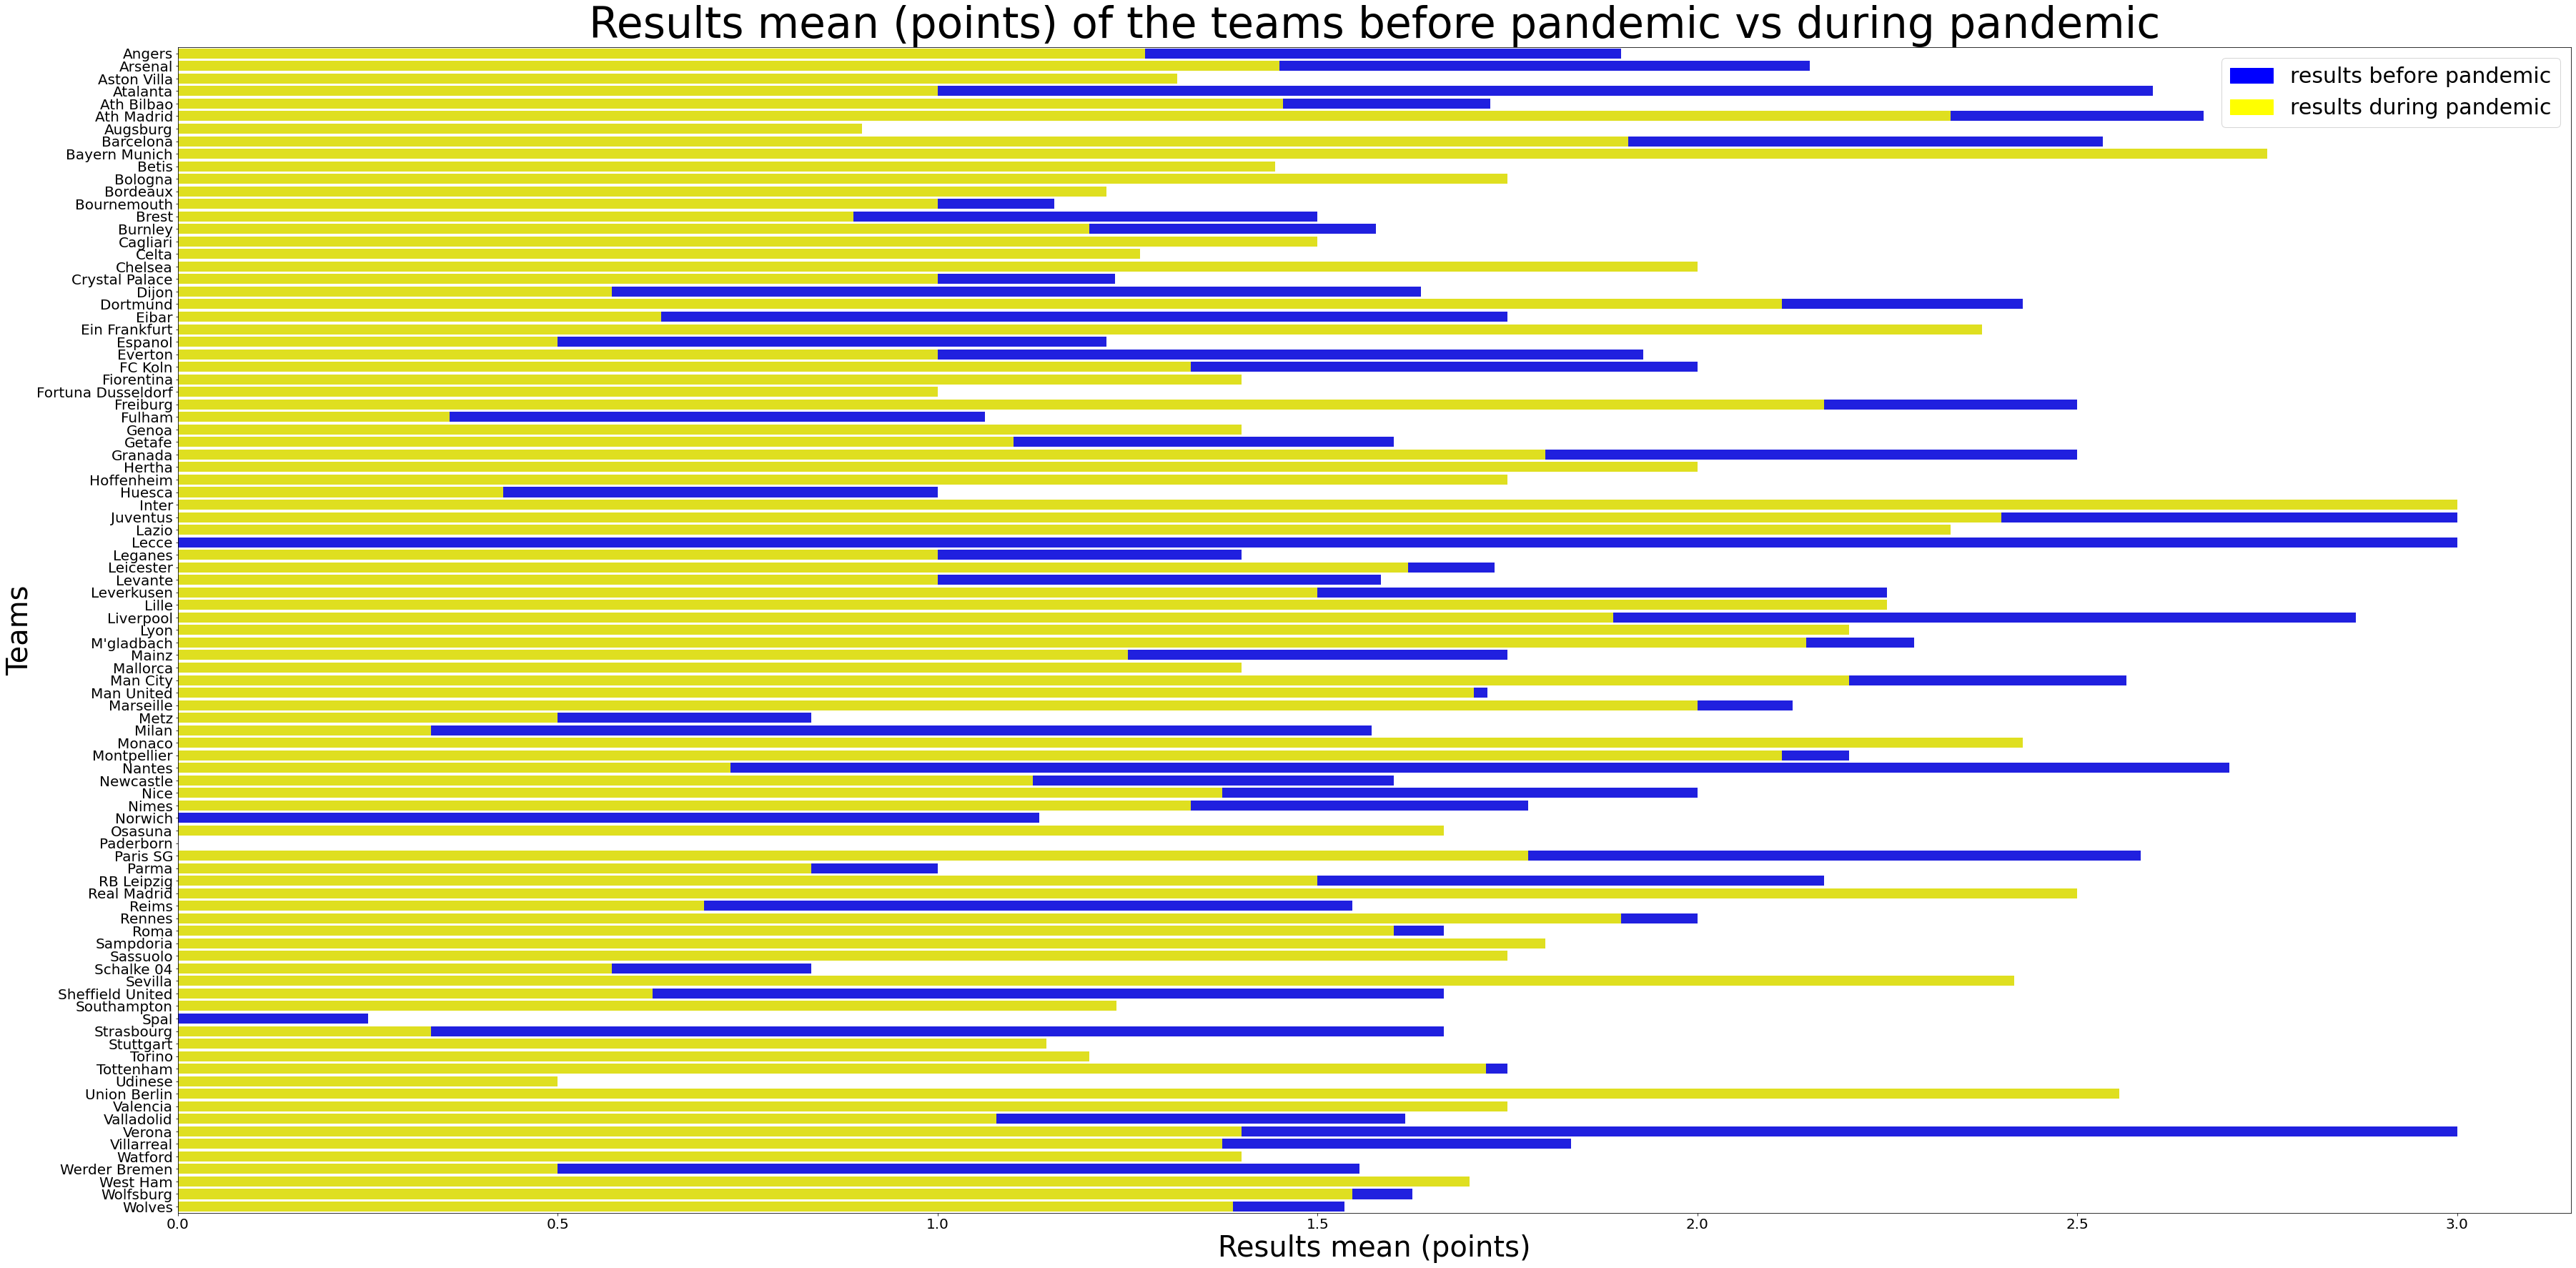

In [62]:
#plot the data
import seaborn as sns
import matplotlib.patches as mpatches

sns.barplot(y="hometeam",x="result_before_pandemic",data=statistics_df,color="blue",orient="h")
sns.barplot(y="hometeam",x="result_on_pandemic",data=statistics_df,color="yellow",orient="h")
plt.title("Results mean (points) of the teams before pandemic vs during pandemic",fontsize=60)
plt.ylabel("Teams",fontsize=40)
plt.xlabel("Results mean (points)",fontsize=40)
plt.tick_params(labelsize=20)
plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='blue', label="results before pandemic")
yellow_patch = mpatches.Patch(color='yellow', label="results during pandemic")
plt.legend(handles=[blue_patch,yellow_patch],fontsize=30)

**The graph shows that in general, the teams got lower results like local during the pandemic vs before the pandemic. Further, we can calculate the count of teams that got lower results during the pandemic:**

In [65]:
#creating validation column
statistics_df["validation"]=np.where(statistics_df['result_before_pandemic']>statistics_df['result_on_pandemic'],1,0)
total_validation = statistics_df["validation"].sum()

print("percent teams with results better before the pandemic vs during the pandemic : ",total_validation/int(statistics_df.shape[0]))
print("mean points got before the pandemic of local: ",statistics_df["result_before_pandemic"].mean())
print("mean points got during the pandemic of local: ",statistics_df["result_on_pandemic"].mean())

percent teams with results better before the pandemic vs during the pandemic :  0.6236559139784946
mean points got before the pandemic of local:  1.6150425081326163
mean points got during the pandemic of local:  1.3964480336771359


**Though the performance of one team can change between seasons, it's clear that exist one loss of the performance of local teams in the general. The data show a loss of 20% in the performance in general of teams.**

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)  

## CONCLUSIONS

The analysis developed suggests:

1-The attendance affects the results of the local teams positively. The regression model suggests that attendance major gives one advantage to the local teams. Further, we can consider attendance as a good predictor of the results of the matches.

2-The statistic analysis verifies the results get on the regression model, comparing the results of the matches during the pandemic (without crowd) vs before the pandemic (with the crowd).